# Data Exploration for the development of the first model


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns

import tensorflow as tf

from tensorflow.keras import layers

In [6]:
df = pd.read_csv('/home/ubuntu/efs/original-data/meta_all.csv')

In [7]:
# Convert the strings that are in 'features' to python lists
df['features'] = df.features.apply(eval)

In [8]:
# Find the distribution of features per item
df['feature_len'] = df.features.apply(len)

'This is a histogram of the number of features per image'

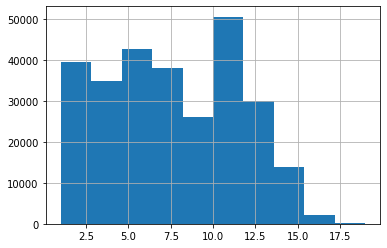

In [9]:
df.feature_len.hist()
"This is a histogram of the number of features per image"

In [10]:
# This method is much faster than built in pandas function
list_of_all_features = np.concatenate(df.features)

In [11]:
# Find the total number of unique features
len(set(list_of_all_features))

1483

In [12]:
df.shape

(277386, 20)

In [13]:
# Return the most common features
feature_list_count = Counter(list_of_all_features).most_common()

# List of all the rare features
rare_features = [feature[0] for feature in feature_list_count if feature[1]<1000]

# List of common features
common_features = [feature[0] for feature in feature_list_count if feature[1]>=1000]

In [14]:
print('Number of rare features: {}\nNumber of common features: {}'.format(len(rare_features), len(common_features)))

Number of rare features: 1215
Number of common features: 268


In [18]:
# Print each line from this cell
InteractiveShell.ast_node_interactivity = "all"

# This cell is just checking to see that in a random instance 
# the features that are kept are the common ones

random_slice = 1000

df.features[random_slice]

set(df.features[random_slice]).intersection(common_features)

print('uni' in common_features)

print('silber' in common_features)

['uni', 'silber']

{'uni'}

True
False


# Filter down to one image per product

In [16]:
# make a df that has no product ID duplicates
df_unique = df.drop_duplicates(subset=['prod_id'])
df_unique.reset_index(drop=True, inplace=True)
all_features = np.concatenate(df_unique.features)
# make a df that counts the number of rows(unique photos) per 

In [17]:
df_unique.shape

(99425, 21)

In [18]:
Counter(all_features).most_common(250)

[('unifarben', 32808),
 ('CO', 31421),
 ('gemustertodermitdruck', 19368),
 ('langarm', 16052),
 ('EL', 14977),
 ('weichergriff', 14139),
 ('100baumwolle', 13390),
 ('kunstmischgewebe', 13254),
 ('PES', 12427),
 ('mittelschwerequalitaet', 11917),
 ('rundhalsausschnitt', 11795),
 ('reisverschluss', 11186),
 ('echtesleder', 10034),
 ('PA', 9250),
 ('leichtequalitaet', 7899),
 ('grafischemmuster', 6825),
 ('CV', 6447),
 ('mischgewebemitelasthan', 6141),
 ('casual', 6036),
 ('kurzarm', 6016),
 ('ausjersey', 5649),
 ('L18', 5412),
 ('normalelange', 4765),
 ('naturfasermitelasthan', 4730),
 ('knopfe', 4705),
 ('L1', 4199),
 ('gewebemitflacheroptik', 3973),
 ('naturfasermischgewebe', 3882),
 ('weihnachten', 3770),
 ('leistentaschen', 3716),
 ('WO', 3666),
 ('freizeit', 3635),
 ('aufdruck', 3576),
 ('normalebundhohe', 3566),
 ('SE', 3515),
 ('gummi', 3464),
 ('organischemmuster', 3421),
 ('streifenmuster', 3335),
 ('fachmitreissverschluss', 3252),
 ('papier', 3187),
 ('inmidirocklange', 3181),


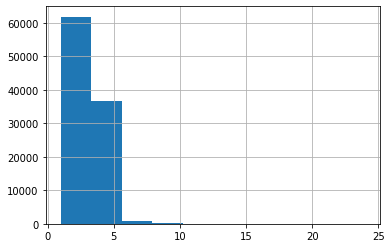

In [19]:
# Number of images(globus_ids) for each product
df.groupby('prod_id').count().globus_id.hist()

In [20]:
# Different way of representing the number of photos associated with particular products
for i in range(1, 25):
    print('number of products with {} photos:'.format(i), np.sum(df.groupby('prod_id').count().globus_id == i))

number of products with 1 photos: 25038
number of products with 2 photos: 17631
number of products with 3 photos: 19131
number of products with 4 photos: 30077
number of products with 5 photos: 6682
number of products with 6 photos: 553
number of products with 7 photos: 165
number of products with 8 photos: 56
number of products with 9 photos: 29
number of products with 10 photos: 20
number of products with 11 photos: 6
number of products with 12 photos: 7
number of products with 13 photos: 21
number of products with 14 photos: 2
number of products with 15 photos: 1
number of products with 16 photos: 1
number of products with 17 photos: 1
number of products with 18 photos: 0
number of products with 19 photos: 2
number of products with 20 photos: 0
number of products with 21 photos: 0
number of products with 22 photos: 0
number of products with 23 photos: 0
number of products with 24 photos: 1


In [21]:
# removes the 'others' description
df2 = df[df.descr != 'others']
# filter so that we only have products that occur more than 1500 times
df2_filtered = df2.groupby('descr').filter(lambda x: len(x) >= 1500)

In [22]:
# Different way of representing the number of photos associated with particular products
for i in range(10):
    print('number of products with {} photos:'.format(i), np.sum(df2_filtered.groupby('prod_id').count().globus_id == i))

number of products with 0 photos: 0
number of products with 1 photos: 3741
number of products with 2 photos: 5265
number of products with 3 photos: 5480
number of products with 4 photos: 14240
number of products with 5 photos: 2644
number of products with 6 photos: 92
number of products with 7 photos: 13
number of products with 8 photos: 1
number of products with 9 photos: 1


In [23]:
df2_filtered['descr'].value_counts()

tshirt                  10584
strickpullover           8908
kleid                    6321
hemdslimfit              5366
schlupfbluse             4010
poloshirt                3469
umhangetasche            3387
handtasche               3254
portemonnaieausleder     3145
stiefelette              3090
strickjacke              3079
sweatshirt               2978
hemdregularfit           2807
schal                    2708
stoffhose                2644
langarmshirt             2387
schultertasche           2331
top                      2325
shorts                   2092
ledersneaker             2031
chinohose                2028
hose                     1955
rucksack                 1916
baumschmuck              1828
shopper                  1813
bluse                    1807
hemdtailliert            1797
daunenjacke              1724
slip                     1713
cashmerepullover         1687
sneaker                  1616
socken                   1592
pyjama                   1588
shirt     

In [24]:
tshirts = df2[df2['descr'] == 'tshirt']

In [25]:
# make a df that has no product ID duplicates, so this is not by photo, it is by item
df_temp = tshirts.drop_duplicates(subset=['prod_id'])
df_temp.reset_index(drop=True, inplace=True)
all_tshirt_features = np.concatenate(df_temp.features)

In [26]:
print("Number of features tshirts are tagged with: ", len(Counter(all_tshirt_features).most_common()))

Number of features tshirts are tagged with:  125


In [27]:
print("There are", len(set(tshirts.prod_id)), "tshirts")
print("There are", tshirts.shape[0], "images of shirts")

There are 2947 tshirts
There are 10584 images of shirts


# Narrowing the scope of the model to only the categories agreed upon

In [28]:
cat = ['taschen', 'schuhe', 'pullover-strick', 'top-shirts-sweats',
       'schals', 'hemden', 'hosen', 'oberteile', 'blusen-tuniken',
       'shirts-tops-sweats', 'kleider']

In [29]:
df_narrow = df[df.hierarchy_2.isin(cat)]

In [30]:
df_narrow.shape

(115267, 21)

In [31]:
df_narrow_unique = df_narrow.drop_duplicates(subset=['prod_id'])

In [32]:
df_narrow_unique.shape

(33997, 21)

In [33]:
df_narrow_unique.columns

Index(['unique_id', 'globus_id', 'descr', 'name', 'gender', 'source_color',
       'color', 'url', 'features', 'season', 'hierarchy_full', 'hierarchy_1',
       'hierarchy_2', 'hierarchy_3', 'hierarchy_4', 'hierarchy_5',
       'hierarchy_6', 'href', 'prod_id', 'feature_len', 'common_features'],
      dtype='object')

In [34]:
df_narrow_unique.isna().sum()

unique_id              0
globus_id              0
descr                  0
name                  52
gender                 0
source_color           7
color                 98
url                    0
features               0
season                 0
hierarchy_full         0
hierarchy_1            0
hierarchy_2            0
hierarchy_3        33997
hierarchy_4        33997
hierarchy_5        33997
hierarchy_6        33997
href                   0
prod_id                0
feature_len            0
common_features        0
dtype: int64

In [35]:
# Check to see the number of products in hierarchy_2
df_narrow_unique.hierarchy_2.value_counts()

taschen               6587
schuhe                4174
pullover-strick       3902
top-shirts-sweats     2995
schals                2551
hemden                2416
hosen                 2343
oberteile             2312
blusen-tuniken        2290
shirts-tops-sweats    2223
kleider               2204
Name: hierarchy_2, dtype: int64

In [36]:
df_narrow.hierarchy_2.value_counts()

schuhe                15956
taschen               15371
pullover-strick       15186
top-shirts-sweats     11606
hemden                10931
blusen-tuniken         9141
hosen                  9096
kleider                8804
shirts-tops-sweats     8732
oberteile              5460
schals                 4984
Name: hierarchy_2, dtype: int64

In [37]:
num_products = df_narrow_unique.hierarchy_2.value_counts().rename_axis('category').reset_index(name='product_counts')
num_photos = df_narrow.hierarchy_2.value_counts().rename_axis('category').reset_index(name='photo_counts')

In [48]:
counts_combined = pd.merge(num_photos, num_products, on=['category']).melt(id_vars='category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

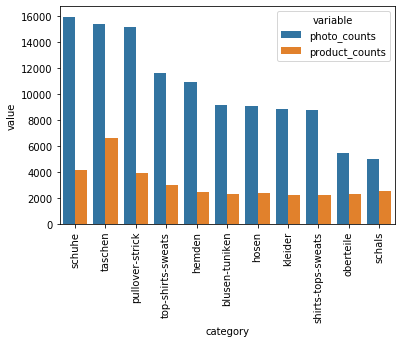

<Figure size 1440x720 with 0 Axes>

In [65]:
sns.barplot(x='category', y='value', hue='variable', data = counts_combined)
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))
plt.show()

## Distribution of photos per unique product

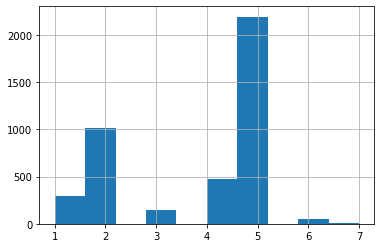

In [42]:
df_narrow[df_narrow.hierarchy_2 == 'schuhe'].groupby('prod_id').count().globus_id.hist()

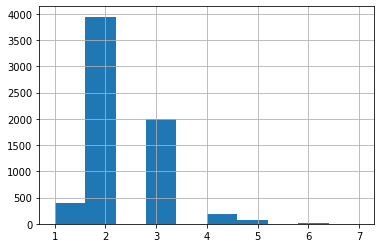

In [43]:
df_narrow[df_narrow.hierarchy_2 == 'taschen'].groupby('prod_id').count().globus_id.hist()

# Visualize a picture

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
pics = '/home/ubuntu/efs/original-data/pictures/'
loc = 'damen/39694.webp'
im = Image.open(pics + loc).convert('RGB')
imgplot = plt.imshow(im)
plt.show()

/home/ubuntu/anaconda3/envs/py374/lib/python3.7/site-packages/PIL/Image.py:2817: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


OSError: cannot identify image file '/home/ubuntu/efs/original-data/pictures/damen/39694.webp'

In [ ]:
df.iloc[1].url

In [ ]:
# grab am image for a specific item in the df
loc = 'damenaccessoires/taschen/1751581.webp'
# 100020 to 1000000
im = Image.open(pics + loc).convert('RGB')
imgplot = plt.imshow(im)
plt.show()


In [ ]:
# Look at the first handbag, if the product id matches then the image is for the same product
print(df.iloc[0].prod_id, df.iloc[1].prod_id, df.iloc[2].prod_id, df.iloc[3].prod_id)

In [ ]:
imagenames = [df.iloc[i].globus_id for i in range(3)]

In [ ]:
df.iloc[1].url

In [ ]:
# grab am image for a specific item in the df
for filename in imagenames:
    loc = 'damenaccessoires/taschen/' + str(filename) + '.webp'
    im = Image.open(pics + loc).convert('RGB')
    imgplot = plt.imshow(im)
    plt.show()

In [ ]:
df.iloc[0]